### Markowitz Efficient Frontier - SETFNN50, INFY

In [1]:
import numpy as np
import pandas as pd
import nsepy as nse
import matplotlib.pyplot as plt

In [2]:
from nsepy import get_history
from datetime import date

In [3]:
assets = ['INFY', 'SETFNN50']
pf_data = pd.DataFrame()
for t in assets:
    pf_data[t] = nse.get_history(t, index = False, start = date(2018, 1, 1), end = date(2023, 3, 24))['Close']

In [4]:
pf_data

,INFY,SETFNN50
Date,,
2018-01-01,1033.55,312.95
2018-01-02,1029.70,309.75
2018-01-03,1021.30,311.25
2018-01-04,1015.40,313.94
2018-01-05,1012.00,319.00
...,...,...
2023-03-20,1403.65,392.44
2023-03-21,1390.70,394.16
2023-03-22,1389.25,399.54


In [5]:
pf_data.tail()

,INFY,SETFNN50
Date,,
2023-03-20,1403.65,392.44
2023-03-21,1390.70,394.16
2023-03-22,1389.25,399.54
2023-03-23,1374.55,397.93
2023-03-24,1380.65,394.54


<AxesSubplot:xlabel='Date'>

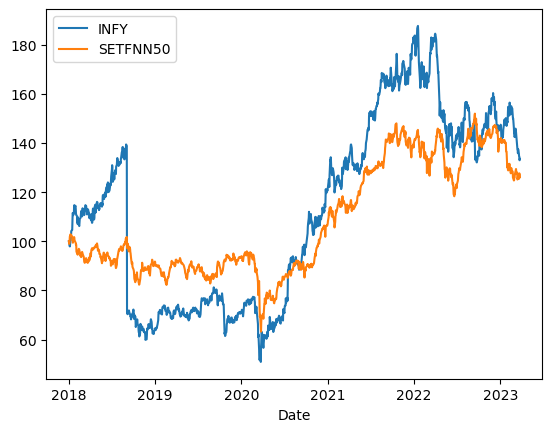

In [6]:
(pf_data/pf_data.iloc[0]*100).plot()

In [7]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [8]:
log_returns.mean()*250

INFY        0.055856
SETFNN50    0.044691
dtype: float64

In [9]:
log_returns.cov()*250

,INFY,SETFNN50
INFY,0.167169,0.021380
SETFNN50,0.021380,0.035326


In [10]:
log_returns.corr()

,INFY,SETFNN50
INFY,1.000000,0.278219
SETFNN50,0.278219,1.000000


In [11]:
num_assets = len(assets)
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.55224577, 0.25126081])

In [13]:
arr[0]+arr[1]

0.8035065758051445

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)

weights

array([0.96896994, 0.03103006])

In [15]:
weights[0]+weights[1]

1.0

### Expected Portfolio Returns

In [16]:
np.sum(weights*log_returns.mean())*250

0.05550906096883512

### Expected Portfolio Variance

In [17]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.15827525650162977

Expected Portfolio Variance

In [18]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.3978382290600411

In [19]:
portfolio_returns = []
portfolo_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolo_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

portfolio_returns, portfolo_volatilities

([0.04986087482524437,
  0.046725000218405234,
  0.05487054297612888,
  0.05092047516923508,
  0.046849305945009585,
  0.05537065829944415,
  0.04795662279764623,
  0.05088925253655553,
  0.045108618848376504,
  0.05515044002884628,
  0.05464043047609772,
  0.04722652707857886,
  0.04673173498340905,
  0.05126956372487778,
  0.04702357026697196,
  0.04744856573007778,
  0.047073267458838365,
  0.051686463259539815,
  0.04648841806096796,
  0.05148759416193365,
  0.05365535024829623,
  0.047922493503371084,
  0.04920404477336686,
  0.04872889167875966,
  0.049392656451242856,
  0.05075919043878589,
  0.05234346180055263,
  0.05122286870537274,
  0.0472260220467147,
  0.049075365746020914,
  0.04682525502229894,
  0.052296746014430046,
  0.049495618669171786,
  0.054706440198562814,
  0.04766238570771982,
  0.05053095916502352,
  0.04628629960574744,
  0.04676656128054795,
  0.049571525843513306,
  0.05198277462135266,
  0.05443574191062917,
  0.04955903376749018,
  0.04853578317767752,


In [20]:
portfolio_returns = []
portfolo_volatilities = []

for x in range (1000):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolo_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
portfolio_returns = np.array(portfolio_returns)
portfolo_volatilities = np.array(portfolo_volatilities)

portfolio_returns, portfolo_volatilities

(array([0.04891778, 0.05218568, 0.05028173, 0.05088562, 0.04727664,
        0.04550789, 0.04927296, 0.05184245, 0.05137315, 0.05049794,
        0.05353427, 0.04612625, 0.05506564, 0.0465019 , 0.05250094,
        0.0506181 , 0.05043896, 0.05118797, 0.05001394, 0.05019964,
        0.04860188, 0.04637598, 0.05569845, 0.05252887, 0.04732574,
        0.05171725, 0.05317587, 0.04989951, 0.05091958, 0.05472621,
        0.04941601, 0.04975133, 0.04563691, 0.04829205, 0.05111001,
        0.04584095, 0.05376513, 0.04944199, 0.05168175, 0.04954928,
        0.04949828, 0.04652283, 0.05094893, 0.05076641, 0.05220552,
        0.04791351, 0.05440082, 0.04679131, 0.0465485 , 0.04981977,
        0.05001698, 0.05053878, 0.04740645, 0.05435008, 0.05396519,
        0.04803736, 0.05088382, 0.04584368, 0.04848389, 0.04648342,
        0.04847251, 0.05347521, 0.05445747, 0.05552982, 0.04802688,
        0.04945396, 0.0517754 , 0.05311179, 0.05414181, 0.04840635,
        0.05070565, 0.05378417, 0.04559281, 0.04

In [21]:
portfolio = pd.DataFrame({'Return':portfolio_returns, 'Volitality':portfolo_volatilities})
portfolio

,Return,Volitality
0,0.048918,0.218318
1,0.052186,0.297634
2,0.050282,0.247821
3,0.050886,0.262730
4,0.047277,0.193481
...,...,...
995,0.055109,0.385213
996,0.046588,0.187615
997,0.045317,0.185106
998,0.051189,0.270560


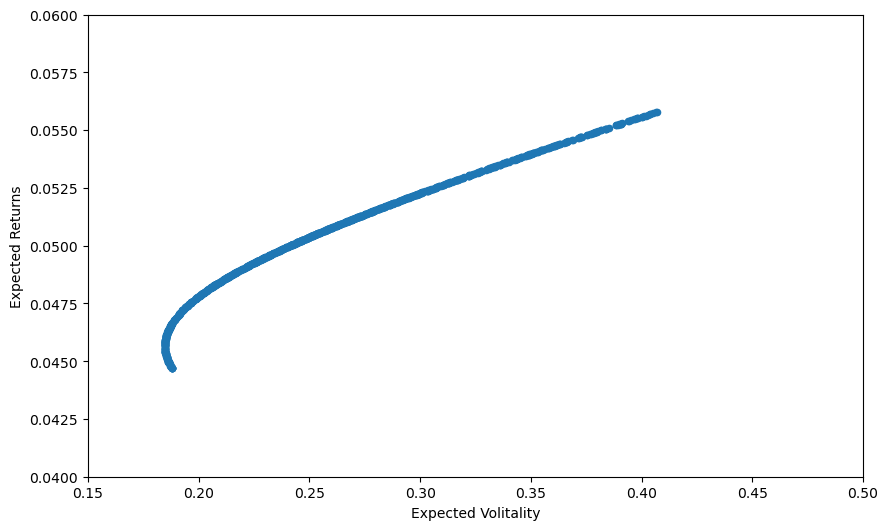

In [31]:
portfolio.plot(x='Volitality', y='Return', kind='scatter', figsize=(10,6))
plt.axis([0.15, 0.50, 0.04, 0.06])
plt.xlabel('Expected Volitality')
plt.ylabel('Expected Returns')
plt.show()